In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import collections
import random
# Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [192]:
col_names = ["classification",
             "age" ,
             "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]
feature_names = [ "age" ,
              "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]

In [193]:
ds = pd.read_csv("../Datasets/breast-cancer.data", header=None, names=col_names)

In [194]:
ds.head()

,classification,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [195]:
ds["deg-malig"] = ds["deg-malig"].astype('category')

In [196]:
set(ds["menopause"].values)

{'ge40', 'lt40', 'premeno'}

In [197]:
one_hot_feature_names = pd.get_dummies(ds[feature_names]).columns.values
one_hot_feature_names

array(['age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_ge40', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_0-4', 'tumor-size_10-14',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_5-9', 'tumor-size_50-54',
       'inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
       'inv-nodes_9-11', 'node-caps_?', 'node-caps_no', 'node-caps_yes',
       'deg-malig_1', 'deg-malig_2', 'deg-malig_3', 'breast_left',
       'breast_right', 'breast-quad_?', 'breast-quad_central',
       'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up', 'irradiat_no',
       'irradiat_yes'], dtype=object)

In [198]:
enc = preprocessing.OneHotEncoder()
enc.fit(ds[feature_names])
FEATURES = enc.transform(ds[feature_names]).toarray()

In [199]:
FEATURES

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [200]:
le = preprocessing.LabelEncoder().fit(ds["classification"])

In [201]:
LABELS = le.transform(ds["classification"])

In [202]:
LABELS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [203]:
def print_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = one_hot_feature_names, class_names=["no-recurrence-events", "RECURRENCE-EVENTS"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('dt.png')
    Image(graph.create_png())

In [204]:
max_depth_acc = 5
min_samples_split_acc =  2
criterion_acc = "entropy"
dt_acc = DecisionTreeClassifier(criterion=criterion_acc, max_depth=max_depth_acc, min_samples_split=min_samples_split_acc)


max_depth_sen = 6
min_samples_split_sen =  85
criterion_sen = "gini"
dt_sen = DecisionTreeClassifier(criterion=criterion_sen, max_depth=max_depth_sen, min_samples_split=min_samples_split_sen)

n_samples = len(LABELS)

In [205]:
training_acc =  np.array([])
training_sen =  np.array([])

for i in range(0, n_samples):
    training_acc = np.append(training_acc, random.sample(range(0,n_samples), 1))
    training_sen = np.append(training_sen, random.sample(range(0,n_samples), 1))
training_acc =  [int(v) for v in np.unique([training_acc])]
training_sen =  [int(v) for v in np.unique([training_sen])] 

dt_acc.fit(FEATURES[training_acc], LABELS[training_acc])
dt_sen.fit(FEATURES[training_sen], LABELS[training_sen])


validation_acc =  np.array([])
validation_sen =  np.array([])
for j in range(0, n_samples):
    if j not in training_acc:
        validation_acc = np.append(validation_acc, j)
    if j not in training_sen:    
        validation_sen = np.append(validation_sen, j)
validation_acc =  [int(v) for v in validation_acc]
validation_sen =  [int(v) for v in validation_sen]
        
acc_pred = np.array([])
for i in range(0, len(validation_acc)):
    feature = [FEATURES[int(validation_acc[i])]]
    acc_pred = np.append(acc_pred, dt_acc.predict(feature))
 
sen_pred = np.array([])
for i in range(0, len(validation_sen)):
    feature = [FEATURES[int(validation_sen[i])]]
    label = [LABELS[int(validation_sen[i])]]
    sen_pred = np.append(sen_pred, dt_sen.predict(feature))


In [206]:
acc_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1.])

In [207]:
sen_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.])

In [208]:
cm_sen = confusion_matrix(LABELS[[int(v) for v in validation_sen]], sen_pred, normalize='true')

In [209]:
cm_acc = confusion_matrix(LABELS[[int(v) for v in validation_acc]], acc_pred, normalize='true')

In [232]:
def ensemble_predict(models, cms, instance):
    n_classes = cms[0].shape[0]
    r = {'class_weights': np.array([0.0 for v in range(0,n_classes)]), 'predictions': np.array([])}
    for i in range(0, len(models)):
        cl_idx = models[i].predict([instance])
        r['predictions'] = np.append(r['predictions'], [cl_idx])
        for j in range(0, n_classes):   
             r['class_weights'][j] += cms[i][j][cl_idx]
    return r        
        

In [233]:
for i in range(0, len(FEATURES)):
    r = ensemble_predict([dt_acc, dt_sen], [cm_acc, cm_sen], FEATURES[i])
    if (0 in r['predictions']) and (1 in r['predictions']):
        print(i)
        break

0


In [234]:
ensemble_predict([dt_acc, dt_sen], [cm_acc, cm_sen], FEATURES[0])

{'class_weights': array([0.91594937, 0.89583333]),
 'predictions': array([1., 0.])}

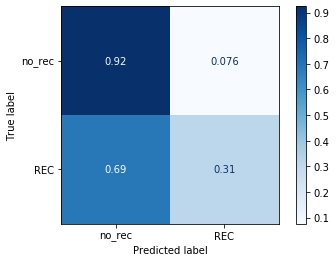

In [235]:
plot_confusion_matrix(dt_acc, FEATURES[validation_acc], LABELS[validation_acc],
                                 display_labels=["no_rec", "REC"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")

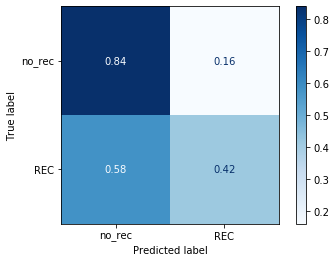

In [236]:
plot_confusion_matrix(dt_sen, FEATURES[validation_sen], LABELS[validation_sen],
                                 display_labels=["no_rec", "REC"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")

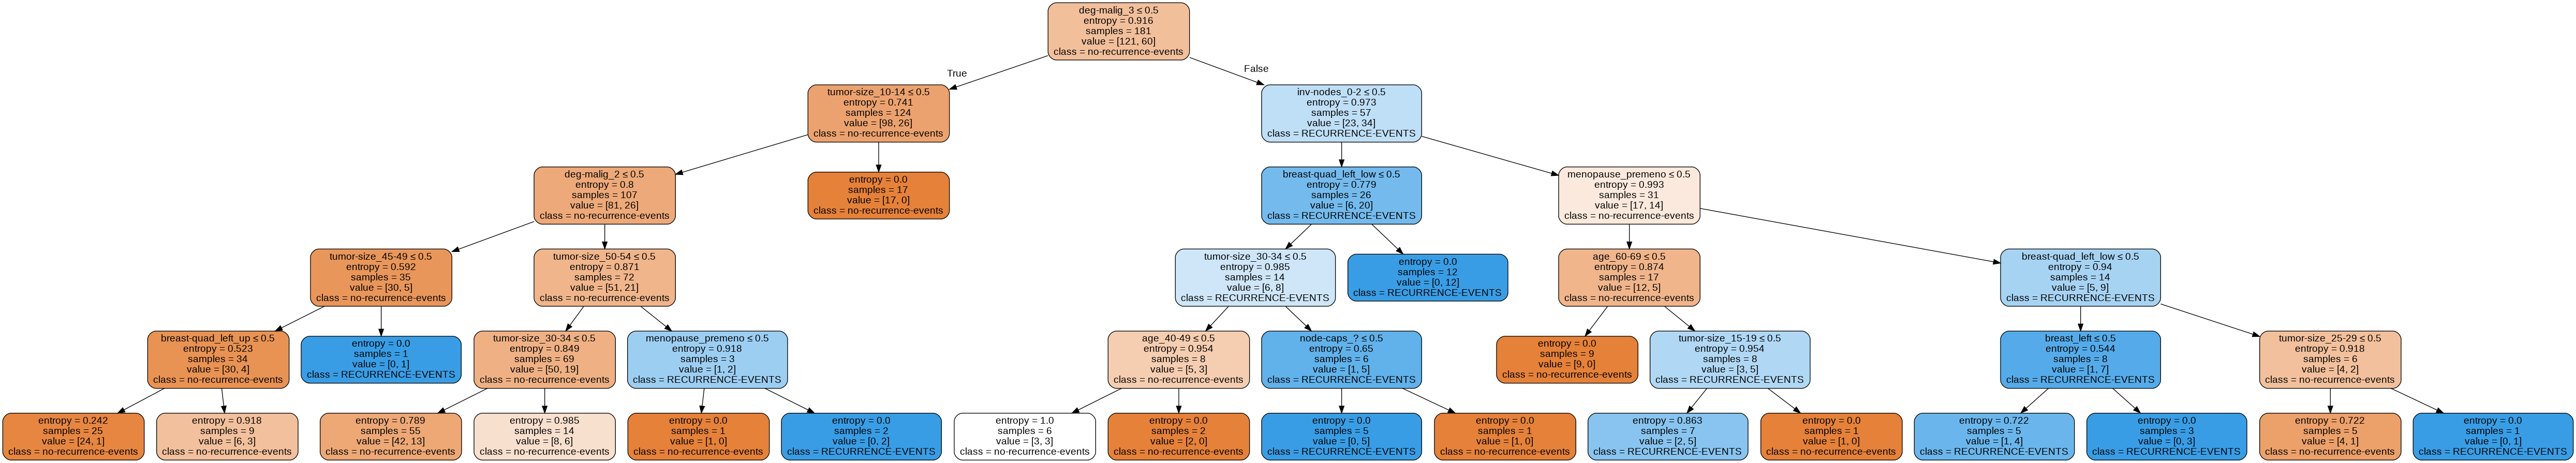

In [40]:
print_tree(dt_acc)
Image("dt.png")

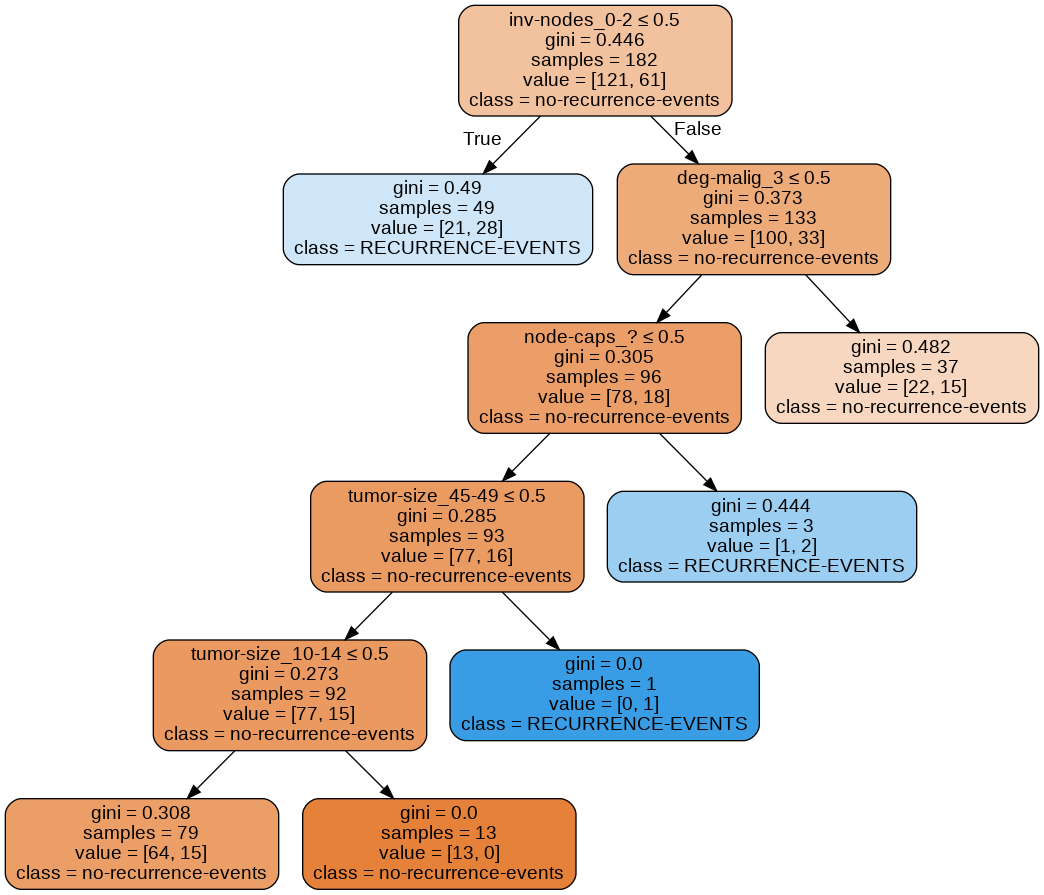

In [41]:
print_tree(dt_sen)
Image("dt.png")